Data Collection

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
!unzip '/content/drive/MyDrive/ibm/archive.zip'

Archive:  /content/drive/MyDrive/ibm/archive.zip
replace Dataset/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**Image Preprocessing**



In [3]:
# import keras library
import keras
#import ImageDataGenerator from keras.preprocessing.image
from keras.preprocessing.image import ImageDataGenerator 

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [32]:

train_datagen = ImageDataGenerator(
                                   rotation_range=180,
                                   brightness_range=None,
                                   shear_range=0.4,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rescale=1./255,)

In [33]:

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
xtrain = train_datagen.flow_from_directory('/content/Dataset/Dataset/train_set',
                                           target_size=(64,64),
                                           class_mode='binary',
                                           batch_size=100)

Found 436 images belonging to 2 classes.


In [8]:
xtest = train_datagen.flow_from_directory('/content/Dataset/Dataset/test_set',
                                           target_size=(64,64),
                                           class_mode='binary',
                                           batch_size=100)

Found 121 images belonging to 2 classes.


**Model Building**

1. Import the Model Builing Libraries

In [9]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

2. Initialize the Model

In [10]:
model = Sequential()

3. Adding CNN Layers

In [11]:
#Convolution Layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [12]:
#MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#Flatten Layer
model.add(Flatten())

4. Adding Dense Layer

In [14]:
#Hidden Layer
model.add(Dense(350,activation='relu')) # Hidden layer 1
model.add(Dense(200,activation='relu')) # Hidden layer 2

In [15]:
#Output Layer
model.add(Dense(1,activation='softmax'))

5. Configuring The Learning Process

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

6. Training the Model

In [17]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

Epoch 1/10
5/5 [==============================] - 26s 4s/step - loss: 1.4973 - accuracy: 0.3555 - val_loss: 0.3514 - val_accuracy: 0.4050
Epoch 2/10
5/5 [==============================] - 15s 3s/step - loss: 0.4535 - accuracy: 0.3555 - val_loss: 0.2428 - val_accuracy: 0.4050
Epoch 3/10
5/5 [==============================] - 15s 3s/step - loss: 0.3121 - accuracy: 0.3555 - val_loss: 0.1192 - val_accuracy: 0.4050
Epoch 4/10
5/5 [==============================] - 15s 3s/step - loss: 0.2170 - accuracy: 0.3555 - val_loss: 0.1250 - val_accuracy: 0.4050
Epoch 5/10
5/5 [==============================] - 15s 3s/step - loss: 0.2326 - accuracy: 0.3555 - val_loss: 0.2255 - val_accuracy: 0.4050
Epoch 6/10
5/5 [==============================] - 15s 3s/step - loss: 0.2271 - accuracy: 0.3555 - val_loss: 0.0764 - val_accuracy: 0.4050
Epoch 7/10
5/5 [==============================] - 15s 3s/step - loss: 0.2485 - accuracy: 0.3555 - val_loss: 0.0523 - val_accuracy: 0.4050
Epoch 8/10
5/5 [==================

7. Saving the Model

In [18]:
model.save('Forest_fire.h5')

8. Prediction

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [40]:
img = image.load_img('/content/Fire-Forest.jpg',target_size=(64,64))

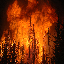

In [41]:
img

In [42]:
x=image.img_to_array(img)
#expand the image shape
x=np.expand_dims(x,axis=0)

In [43]:
pred=model.predict(x)

1/1 [==============================] - 0s 15ms/step


In [44]:
print (pred)

[[1.]]
